In [1]:
import numpy as np
import pandas as pd

import math as m

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data.shape

(400, 11)

In [5]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [6]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

**Bulding a Random Forest model with target variable 'Sales'. Thus, we will first convert it into categorical variable.**
  

In [7]:
Sales_worth=pd.cut(np.array(data["Sales"].values),3, labels=["Low", "Medium", "High"])
data["Sales_worth"]=Sales_worth
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_worth
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,Medium
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,Medium
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,High
8,6.54,132,110,0,108,124,Medium,76,10,No,No,Medium
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,Low


**Using LabelEncoder() to transform Categorical values of ['ShelveLoc','Urban', 'US'] columns to ordinal one.**

In [8]:
cols=['ShelveLoc','Urban', 'US']

In [9]:
from sklearn.preprocessing import LabelEncoder
data[cols]=data[cols].apply(LabelEncoder().fit_transform)
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_worth
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
5,10.81,124,113,13,501,72,0,78,16,0,1,Medium
6,6.63,115,105,0,45,108,2,71,15,1,0,Medium
7,11.85,136,81,15,425,120,1,67,10,1,1,High
8,6.54,132,110,0,108,124,2,76,10,0,0,Medium
9,4.69,132,113,0,131,124,2,76,17,0,1,Low


**<h4>Exploratory Data Analysis</h4>**

<Axes: >

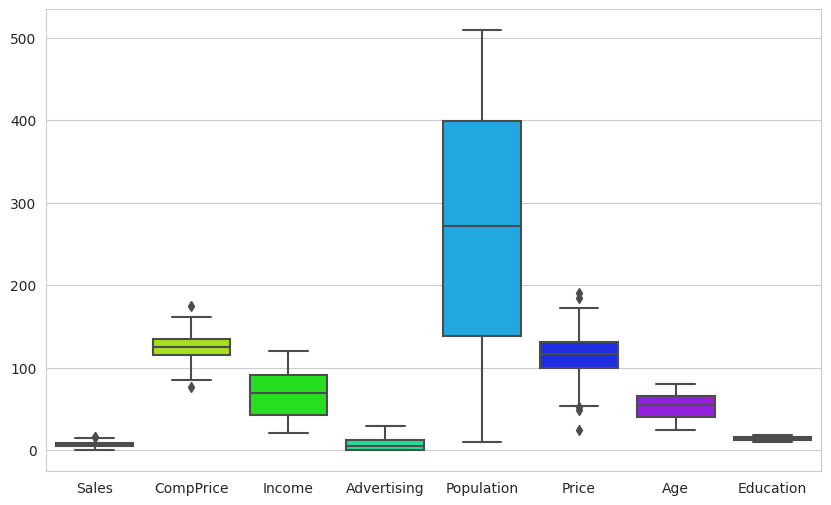

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data.loc[:,['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education']],palette="hsv")

**CompPrice and Price columns are showing outliers but they can vary.**

7.496325000000001
0.18556036318721578


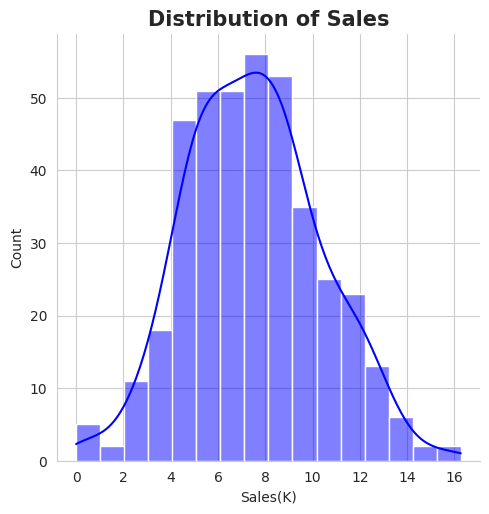

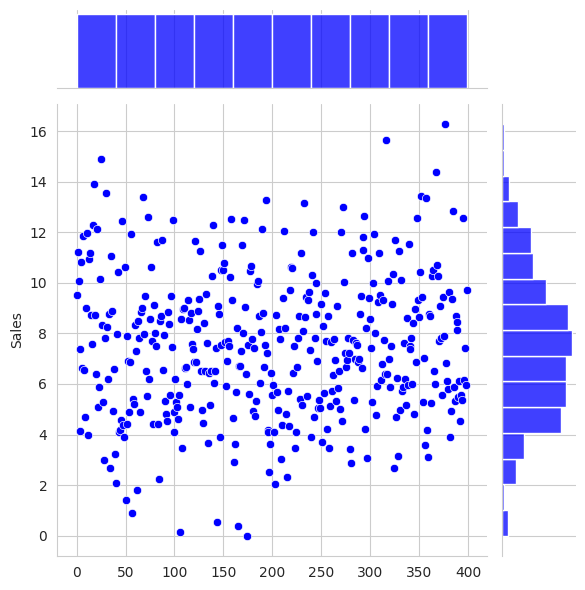

In [11]:
sns.displot(data=data['Sales'],color="b",kde=True)

plt.title("Distribution of Sales",fontweight="bold",fontsize=15)
plt.xlabel("Sales(K)")
sns.jointplot(data=data['Sales'],color="b")

print(data["Sales"].mean())
print(data["Sales"].skew())

**Sales values are uniformly distributed with mean sale of around 165.225 Thousands.**

Text(0.5, 1.0, 'Countplot of Sales worth')

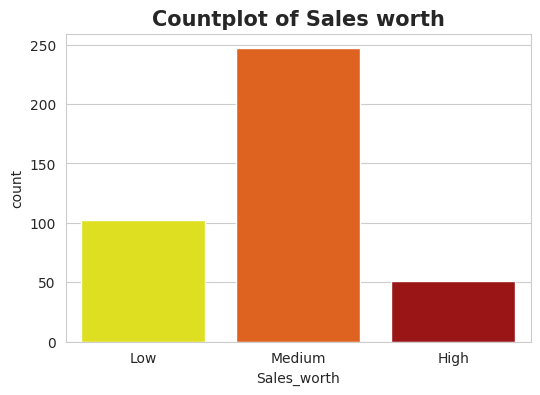

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['Sales_worth'],palette="hot_r")
plt.title("Countplot of Sales worth",fontweight="bold",fontsize=15)

**For majority of stores sale is medium.**

Text(0.5, 1.0, 'Distribution of CompPrice')

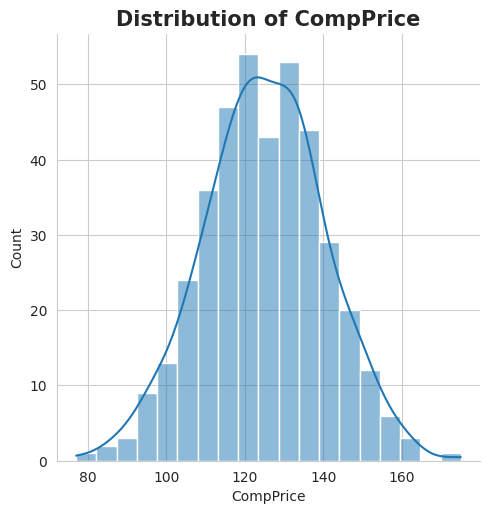

In [13]:
sns.displot(x="CompPrice",data=data,kde=True)
data['CompPrice'].skew()
plt.title("Distribution of CompPrice",fontweight="bold",fontsize=15)

**CompPrice values are uniformly distributed.**

**(CompPrice=Price charged by competitor)**

Mean income level 68.6575


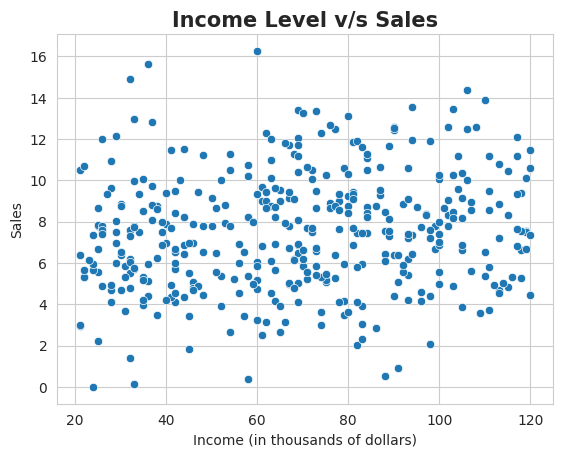

In [14]:
sns.scatterplot(x="Income",y="Sales",data=data)
plt.xlabel("Income (in thousands of dollars)")
plt.title("Income Level v/s Sales",fontweight="bold",fontsize=15)
print("Mean income level",data['Income'].mean())

Text(0.5, 1.0, 'Distribution of Community Income Level')

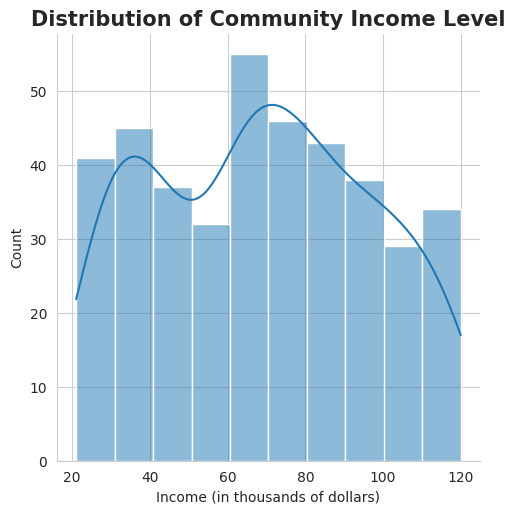

In [15]:
sns.displot(x=data["Income"],data=data,kde=True)
plt.xlabel("Income (in thousands of dollars)")
plt.title("Distribution of Community Income Level",fontweight="bold",fontsize=15)

**Average Community income level ranges from 60-80 thousands of dollars.**

Mean advertising budget- 6.635


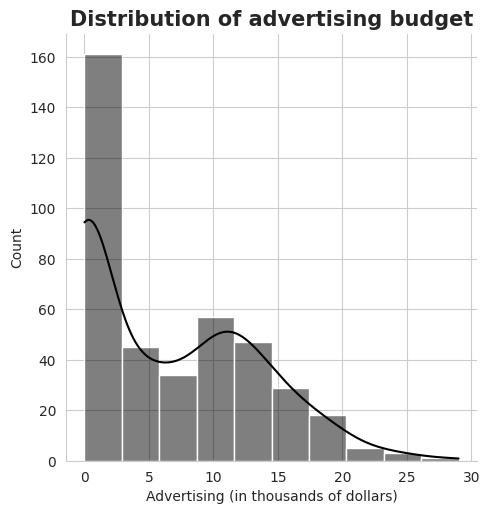

In [16]:
sns.displot(x=data["Advertising"],data=data,color="black",kde=True)
plt.xlabel("Advertising (in thousands of dollars)")
plt.title("Distribution of advertising budget",fontweight="bold",fontsize=15)
print("Mean advertising budget-",data['Advertising'].mean())

**At around 160 stores advertising budget is low ranging between 0 to 2.5 thousands of dollars.**

Text(0.5, 1.0, 'Advertising v/s Sales')

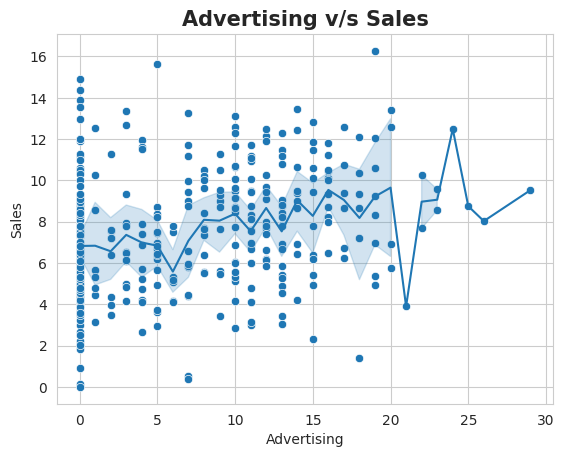

In [17]:
sns.scatterplot(x="Advertising",y="Sales",data=data)
sns.lineplot(x="Advertising",y="Sales",data=data)
plt.title("Advertising v/s Sales",fontweight="bold",fontsize=15)

**From above plot, we can remark that Gross sales rises at some stores with high Advertising budget.**

Text(0.5, 1.0, 'Distribution of Population size in region')

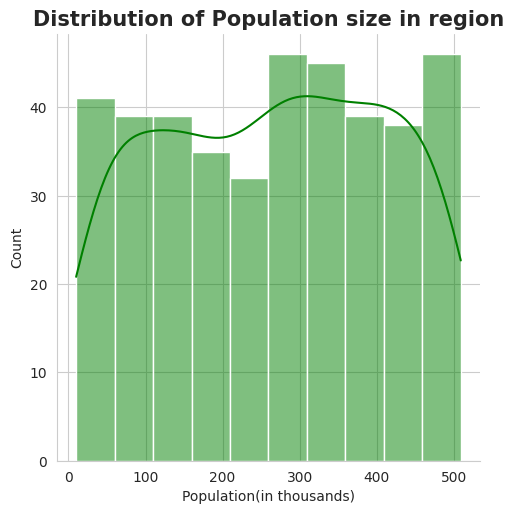

In [18]:
sns.displot(x=data["Population"],data=data,color="g",kde=True)
plt.xlabel("Population(in thousands)")
plt.title("Distribution of Population size in region",fontweight="bold",fontsize=15)

**More than 40 regions have maximun population ranging between 450-500 thousands.**

([<matplotlib.axis.XTick at 0x7e077bf58520>,
 [Text(0, 0, 'Bad'), Text(1, 0, 'Good'), Text(2, 0, 'Medium')])

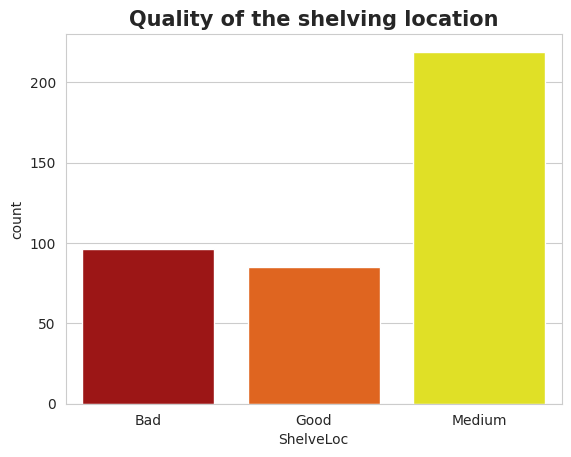

In [19]:
sns.countplot(x=data["ShelveLoc"],palette="hot")
plt.title("Quality of the shelving location",fontweight="bold",fontsize=15)
plt.xticks((0,1,2), ["Bad","Good","Medium"], rotation ='horizontal')

**At 200 plus stores quality of the shelving location for the car seats is Medium.**

Text(0.5, 1.0, 'Age v/s Sales')

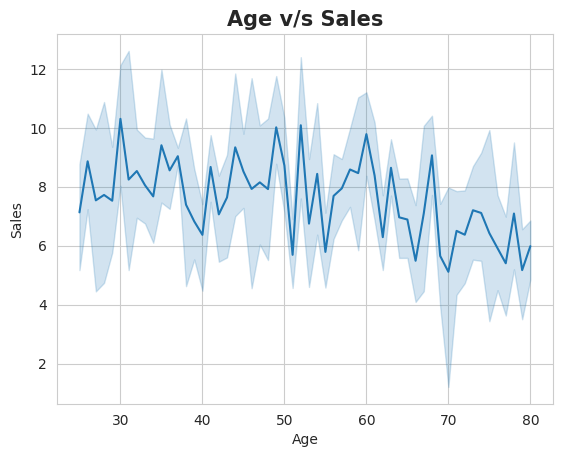

In [20]:
sns.lineplot(x="Age",y="Sales",data=data)
plt.title("Age v/s Sales",fontweight="bold",fontsize=15)

From the above lineplot we can observe that,with aged population there is a slight decrease in the sales values.

1    282
0    118
Name: Urban, dtype: int64


Text(0.5, 1.0, 'Store Location')

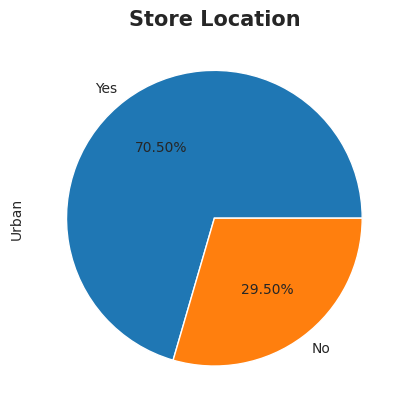

In [21]:
data["Urban"].value_counts().plot(kind="pie",autopct='%.2f%%',labels=["Yes","No"])
print(data["Urban"].value_counts())
plt.title("Store Location",fontweight="bold",fontsize=15)

70.50% stores are loacted in Urban area.

1    258
0    142
Name: US, dtype: int64


Text(0.5, 1.0, 'US Location')

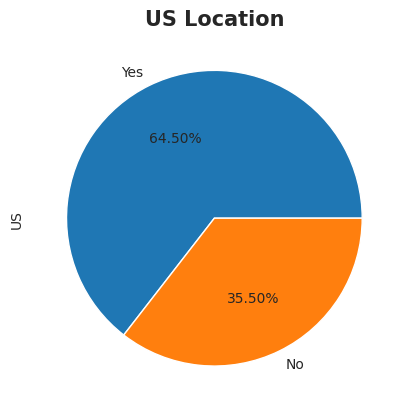

In [22]:
data["US"].value_counts().plot(kind="pie",autopct='%.2f%%',labels=["Yes","No"])
print(data["US"].value_counts())
plt.title("US Location",fontweight="bold",fontsize=15)

**64.50% stores are loacted in US area.**

In [23]:
data.corr()

<ipython-input-23-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


<ipython-input-24-03aedb196685>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="viridis")


<Axes: >

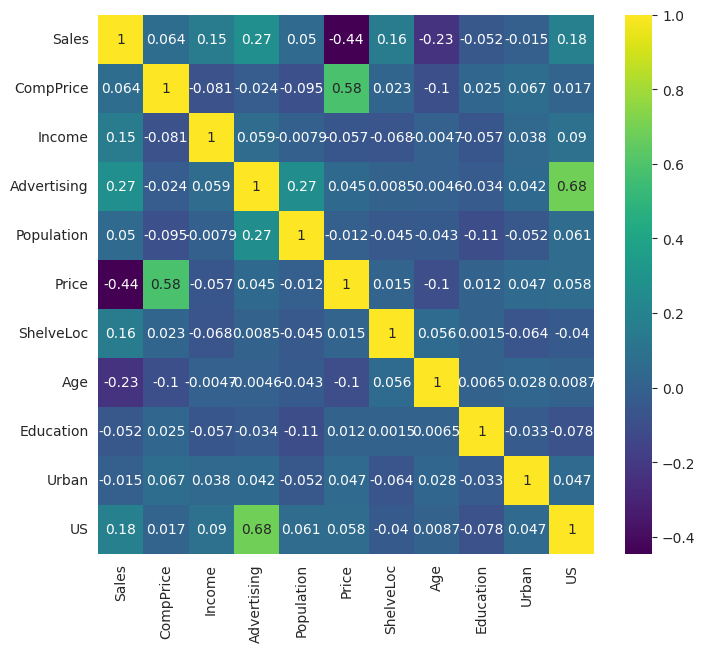

In [24]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(),annot=True,cmap="viridis")

**<h4>"Building a model"</h4>**

We have to build a model to know about attributes causing high sale

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [26]:
X=data.iloc[:,1:11]
y=data.iloc[:,11]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [28]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
163,130,64,0,40,106,0,39,17,0,0
229,98,104,0,404,72,2,27,18,0,0
213,149,84,5,220,139,2,33,10,1,1
188,116,37,0,426,90,2,76,15,1,0
386,152,116,0,170,160,2,39,16,1,0
...,...,...,...,...,...,...,...,...,...,...
343,117,42,10,371,121,0,26,14,1,1
359,130,62,11,396,130,0,66,14,1,1
323,107,105,18,428,103,2,34,12,1,1
280,121,86,10,496,145,0,51,10,1,1


In [29]:
y_train

163    Medium
229      High
213    Medium
188    Medium
386       Low
        ...  
343    Medium
359       Low
323    Medium
280       Low
8      Medium
Name: Sales_worth, Length: 300, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [30]:
X_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
248,111,52,0,12,101,2,61,11,1,1
318,116,72,10,456,130,1,41,14,0,1
173,135,91,5,207,128,2,66,18,1,1
285,146,26,11,261,131,2,39,10,1,1
184,132,33,7,35,97,2,60,11,0,1
...,...,...,...,...,...,...,...,...,...,...
380,106,64,10,17,89,2,68,17,1,1
311,146,68,12,328,132,0,51,14,1,1
110,128,62,7,125,116,2,43,14,1,1
90,115,22,0,491,103,2,64,11,0,0


In [31]:
y_test

248       Low
318    Medium
173    Medium
285    Medium
184    Medium
        ...  
380    Medium
311    Medium
110    Medium
90        Low
6      Medium
Name: Sales_worth, Length: 100, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [32]:
print("Shape : ")
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

Shape : 
X_train (300, 10)
y_train (300,)
X_test (100, 10)
y_test (100,)


In [33]:
model=RandomForestClassifier(criterion="gini",max_depth=15)
model_train=model.fit(X_train,y_train)

In [34]:
pred=model_train.predict(X_test)
pred

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Med

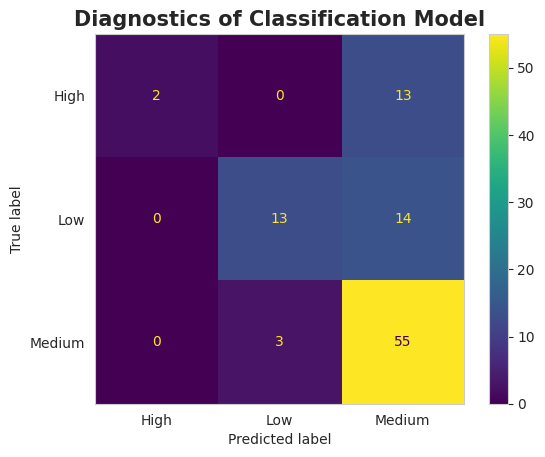

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

result=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(result,display_labels=model_train.classes_).plot()
plt.title("Diagnostics of Classification Model",fontweight="bold",fontsize=15)
plt.grid(False)
plt.show()

In [36]:
acc=accuracy_score(y_test,pred)
print('Accuracy Score is',acc*100, '%')

Accuracy Score is 70.0 %


In [37]:
missclass=1-accuracy_score(y_test,pred)
print('Misclassification:', missclass)

Misclassification: 0.30000000000000004


In [38]:

classification_report(y_test,pred)
print('Classification report \n', classification_report(y_test,pred))

Classification report 
               precision    recall  f1-score   support

        High       1.00      0.13      0.24        15
         Low       0.81      0.48      0.60        27
      Medium       0.67      0.95      0.79        58

    accuracy                           0.70       100
   macro avg       0.83      0.52      0.54       100
weighted avg       0.76      0.70      0.65       100



**<h4>Lets change the criterion to "entropy".</h4>**

In [39]:
model=RandomForestClassifier(criterion="entropy",max_depth=15)
model_train=model.fit(X_train,y_train)

In [40]:
pred=model_train.predict(X_test)
pred

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       

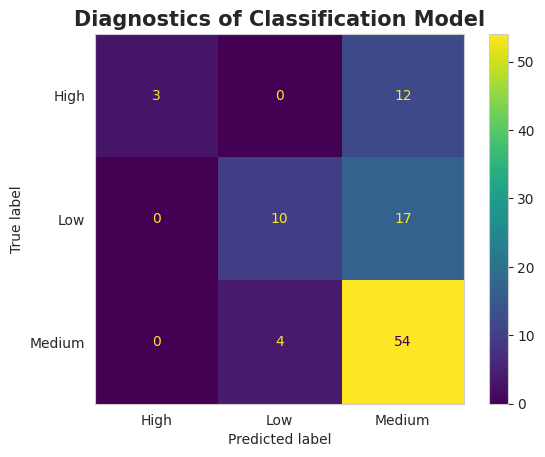

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

result=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(result,display_labels=model_train.classes_).plot()
plt.title("Diagnostics of Classification Model",fontweight="bold",fontsize=15)
plt.grid(False)
plt.show()

In [42]:

acc=accuracy_score(y_test,pred)
print('Accuracy Score is',acc*100, '%')

Accuracy Score is 67.0 %


In [43]:

1-accuracy_score(y_test,pred)
print('Misclassification:', missclass)

Misclassification: 0.30000000000000004


In [44]:
classification_report(y_test,pred)
print('Classification Report \n',classification_report(y_test,pred))

Classification Report 
               precision    recall  f1-score   support

        High       1.00      0.20      0.33        15
         Low       0.71      0.37      0.49        27
      Medium       0.65      0.93      0.77        58

    accuracy                           0.67       100
   macro avg       0.79      0.50      0.53       100
weighted avg       0.72      0.67      0.63       100



**<h4>Random Forest model with entropy criterion gave us better accuracy.</h4>**

In [45]:
model_train.feature_importances_

array([0.12003087, 0.10341433, 0.08677608, 0.0881017 , 0.19435   ,
       0.17600214, 0.13538973, 0.06205879, 0.0166592 , 0.01721717])

In [46]:
impor1=pd.DataFrame({'Feature':list(X.columns), 'Importance':model_train.feature_importances_}).sort_values('Importance', ascending=False)
impor1

,Feature,Importance
4,Price,0.194350
5,ShelveLoc,0.176002
6,Age,0.135390
0,CompPrice,0.120031
1,Income,0.103414
3,Population,0.088102
2,Advertising,0.086776
7,Education,0.062059
9,US,0.017217
8,Urban,0.016659


<Axes: >

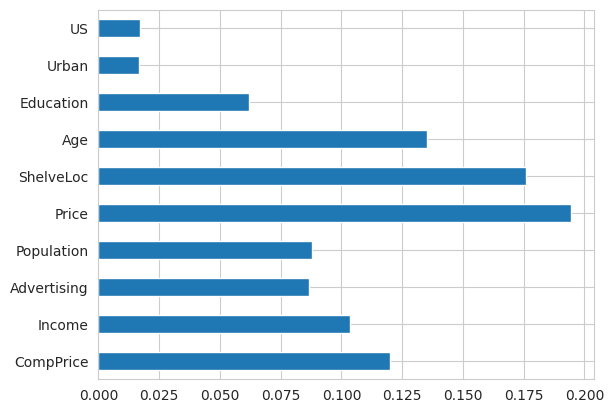

In [47]:
feat_impt=pd.Series(model_train.feature_importances_,index=X.columns)
feat_impt.plot(kind="barh")

**Shelving location, Price, Age, CompPrice are some top attributes contributing to the sales worth high.**